Import statements

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

import numpy as np
import seaborn as sns

import lazypredict
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error as mse # library for Mean squared error regression loss.
from sklearn import metrics #accuracy score,MAE,MSE,RMSQE

from yellowbrick.regressor import prediction_error # Visualize the prediction error
from yellowbrick.regressor import residuals_plot # Visualize the residuals between predicted and actual data 
from yellowbrick.model_selection import LearningCurve # Visualize Learning Curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

plt.rcParams.update({'font.size': 30})
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=1.2, rc={"lines.linewidth": 2.5})
sns.set_style("ticks")
sns.despine()
%matplotlib inline

Reading data file

In [3]:
path = '/Users/bargavikongara/Documents/Clark/STAT4600-01-F22 - INTERMED STATS MODEL ANALYTICS/R Project/Medical Insurance_LR copy.csv'
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Showing first five rows of dataset

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Getting all the unique values in each feature

In [7]:
features = df.columns
for feature in features:
    print(f"{feature} ---> {df[feature].nunique()}")

age ---> 47
sex ---> 2
bmi ---> 548
children ---> 6
smoker ---> 2
region ---> 4
charges ---> 1337


EDA - Exploratory Data Analysis

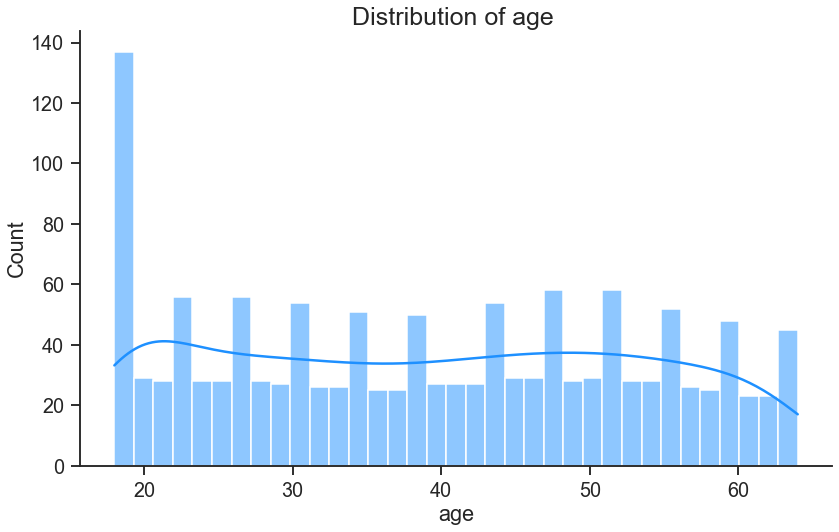

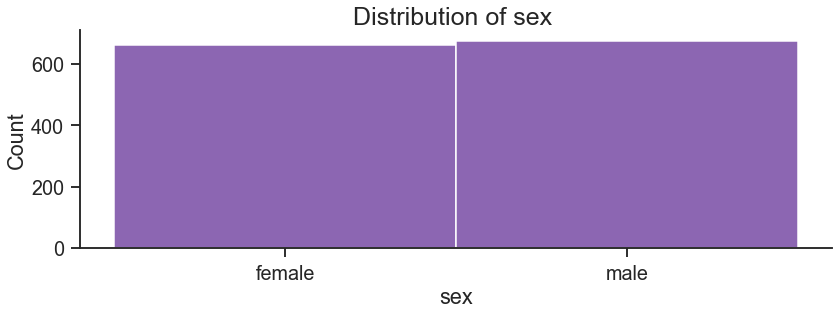

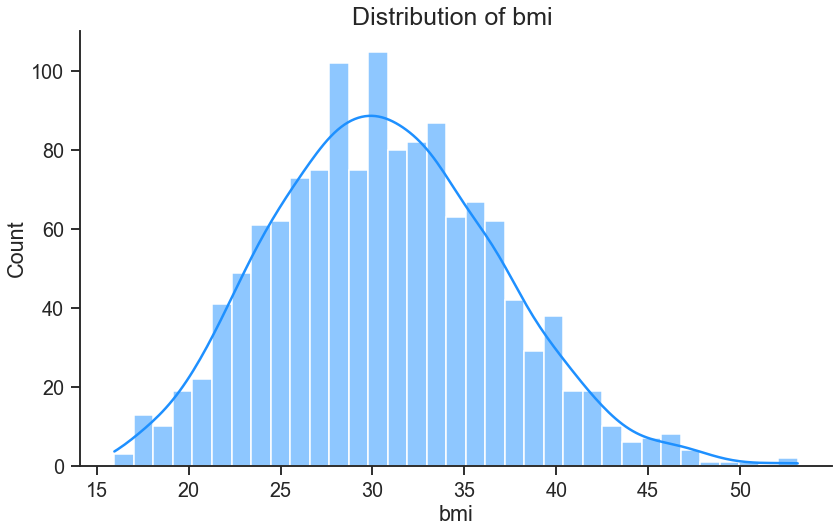

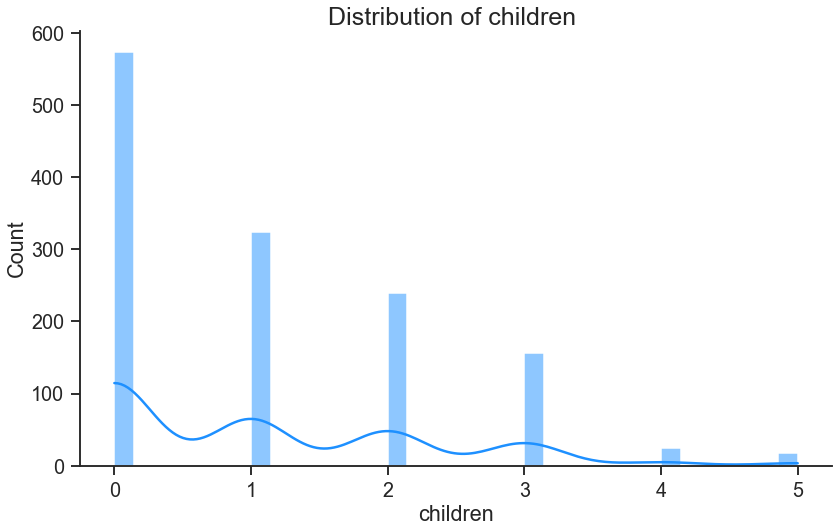

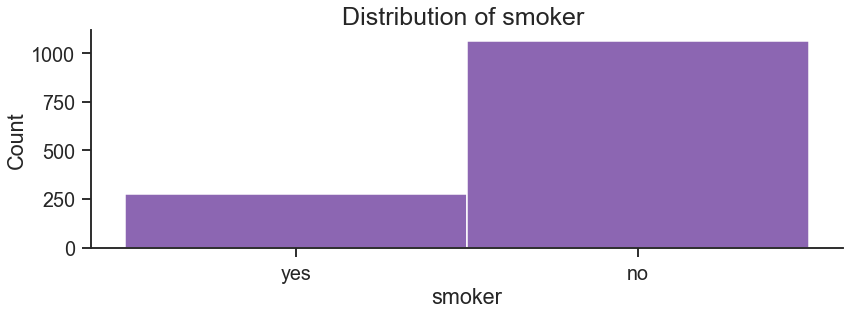

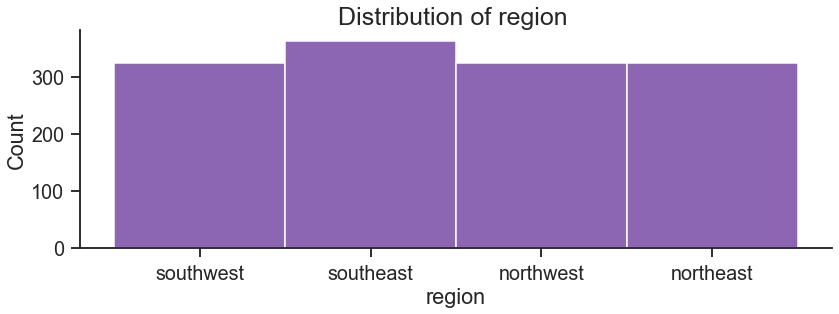

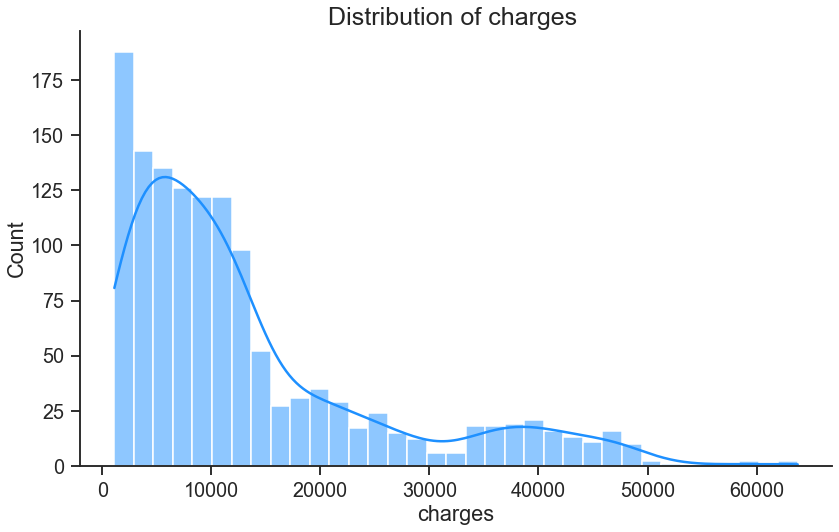

In [8]:
features = df.columns
for feature in features:
    if df[feature].nunique() > 4:
        plt.figure(figsize=(12,8))
        sns.histplot(data = features, x = df[feature], 
                     color = 'dodgerblue', bins = 35, kde = True,)
        plt.title(f"Distribution of {feature} ",fontsize = 25)
        sns.despine()
        plt.show()
    else:
        plt.figure(figsize=(12,4))
        sns.histplot(data = features, x = df[feature], 
                     color = 'rebeccapurple',kde = False)
        plt.title(f"Distribution of {feature} ",fontsize = 25)
        sns.despine()
        plt.show()

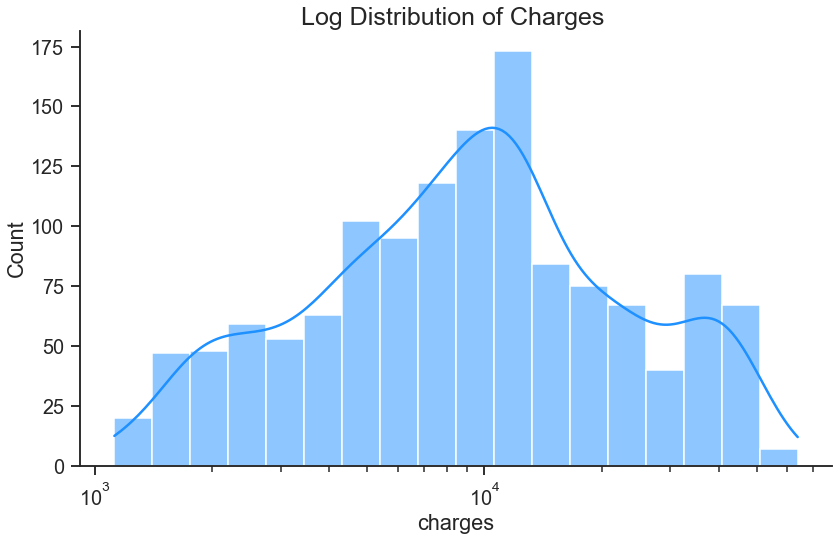

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x = 'charges', color = 'dodgerblue', kde = True, log_scale=True)
plt.title("Log Distribution of Charges ",fontsize = 25)
sns.despine()
plt.show()

Categorical Features Analysis

In [10]:
#Sex Charges
gender = df.groupby('sex').agg(['mean','min','max'])['charges']
m = gender.at['female','mean']
f = gender.at['male','mean']
gender

(print(f'The mean charges for males is {m:.2f} and the mean charges for females is {f:.2f} dollars'))

The mean charges for males is 12569.58 and the mean charges for females is 13956.75 dollars


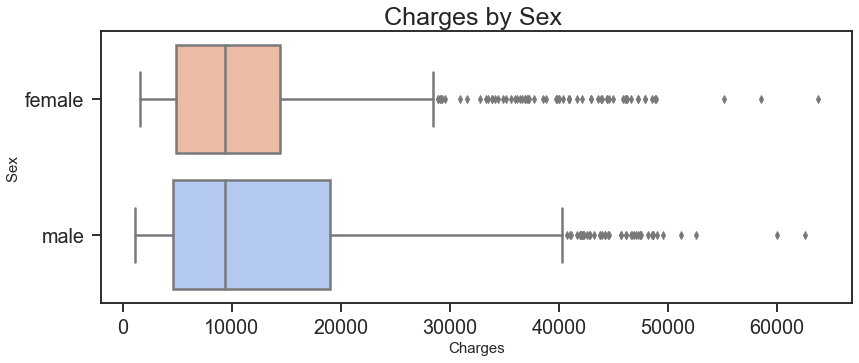

In [11]:
plt.figure(figsize=(12,5))
plt.title("Charges by Sex ", fontsize = 25)
sns.boxplot(data = df, x = 'charges', y = 'sex', palette = 'coolwarm_r',orient = 'h')
plt.ylabel("Sex ", fontsize = 15)
plt.xlabel("Charges", fontsize = 15)
sns.set_context("poster")
plt.show()

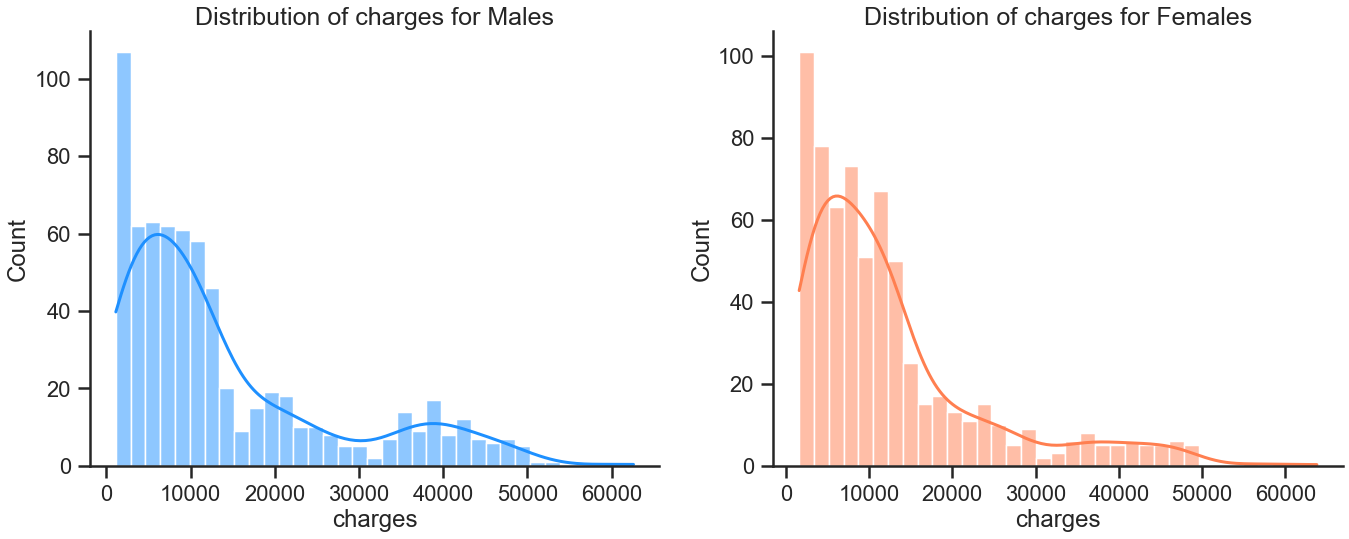

In [12]:
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.histplot(df.query('sex == "male"'), x = 'charges', kde = True, color = 'dodgerblue', bins = 35)
ax.set_title('Distribution of charges for Males', fontsize = 25, )

ax=f.add_subplot(122)
sns.histplot(df.query('sex == "female"'), x = 'charges', kde = True, color = 'coral', bins = 35)
ax.set_title('Distribution of charges for Females', fontsize = 25,)
sns.despine()
plt.show()

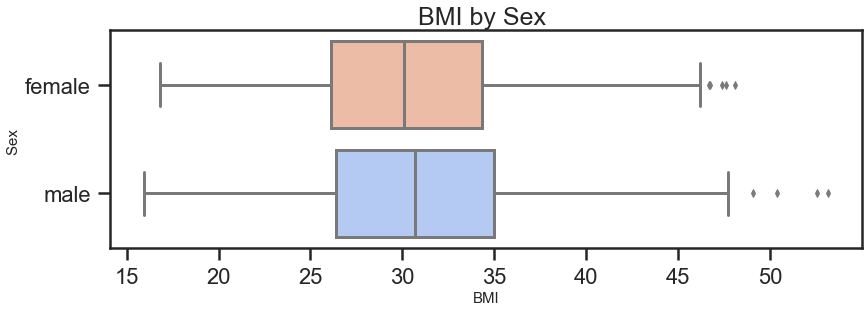

In [13]:
plt.figure(figsize=(12,4))
plt.title("BMI by Sex ",fontsize = 25)
sns.boxplot(data = df, x = 'bmi', y = 'sex', palette = 'coolwarm_r',orient = 'h')
plt.ylabel("Sex ", fontsize = 15)
plt.xlabel("BMI", fontsize = 15)
plt.show()

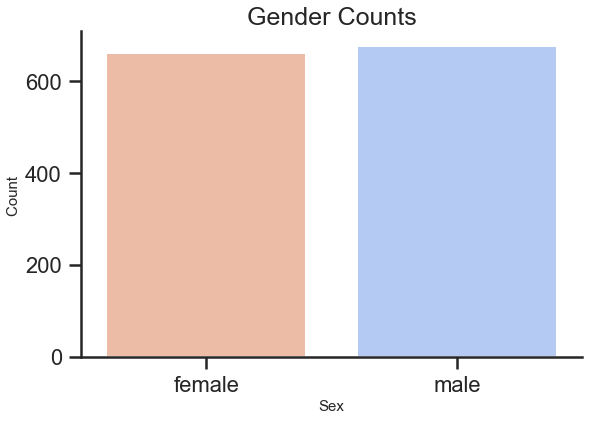

In [14]:
plt.figure(figsize=(8,6))
plt.title("Gender Counts",fontsize = 25)
sns.countplot(data = df, x = 'sex', palette = 'coolwarm_r')
plt.ylabel("Count ", fontsize = 15)
plt.xlabel("Sex", fontsize = 15)
sns.despine()
plt.show()

In [15]:
smokers = df.groupby('smoker').agg(['mean','min','max'])['charges']
smokers

,mean,min,max
smoker,,,
no,8434.268298,1121.8739,36910.60803
yes,32050.231832,12829.4551,63770.42801


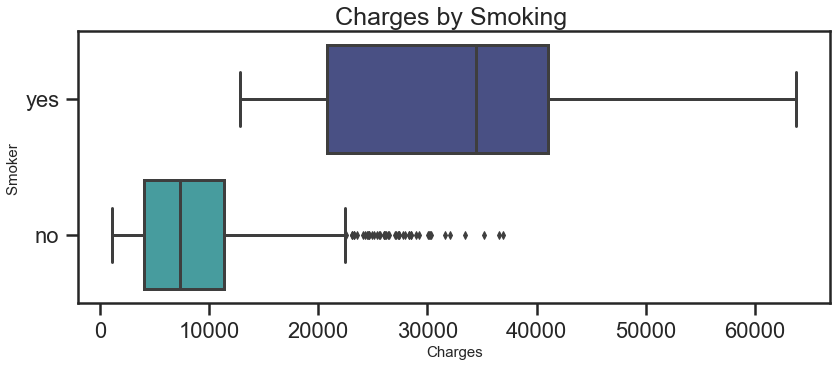

In [16]:
plt.figure(figsize=(12,5))
plt.title("Charges by Smoking ",fontsize = 25)
sns.boxplot(data = df, x = 'charges', y = 'smoker', palette = 'mako', orient = 'h')
plt.ylabel("Smoker ", fontsize = 15)
plt.xlabel("Charges", fontsize = 15)
sns.set_context("talk")
plt.show()

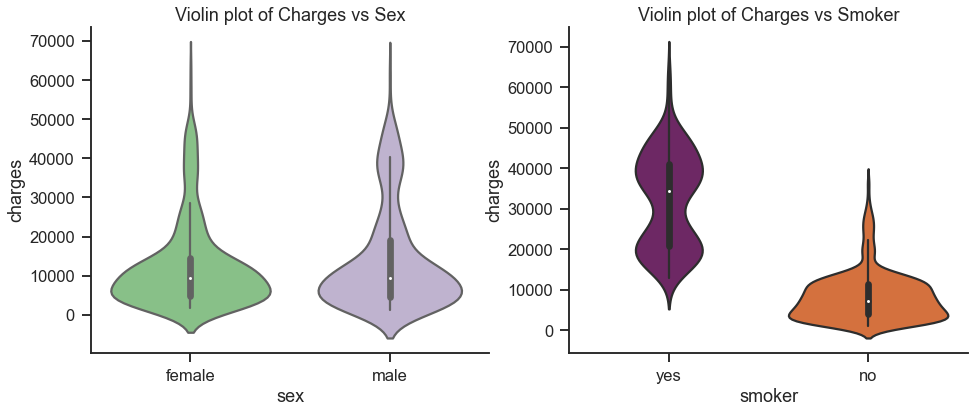

In [17]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Accent',ax=ax)
ax.set_title('Violin plot of Charges vs Sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='inferno',ax=ax)
sns.despine()
ax.set_title('Violin plot of Charges vs Smoker');

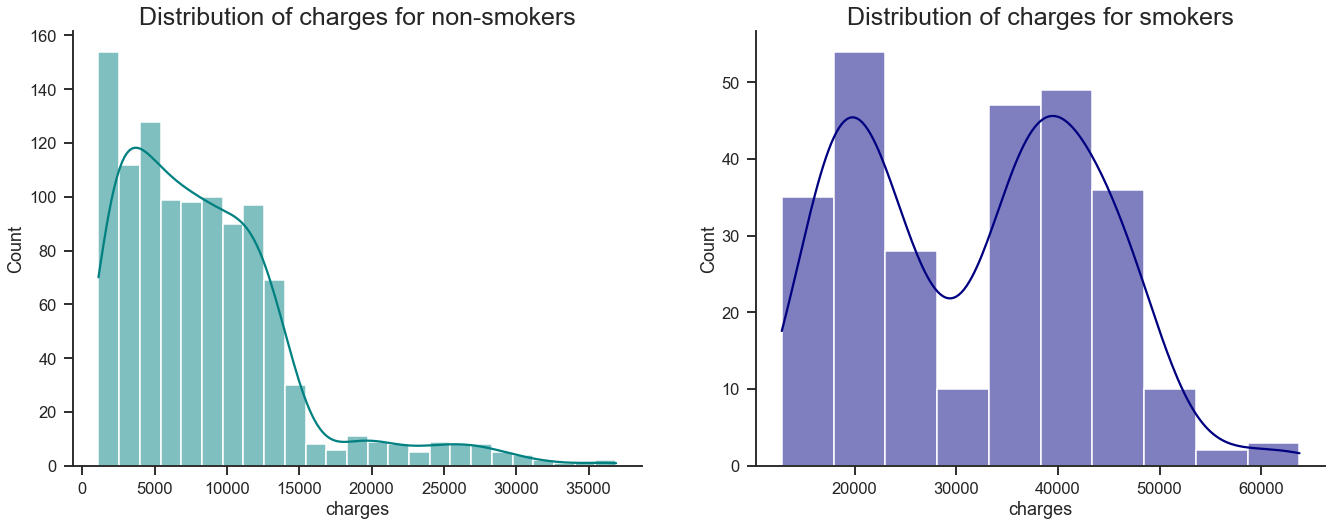

In [18]:
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.histplot(df.query('smoker == "no"'), x = 'charges', kde = True, color = 'teal')
ax.set_title('Distribution of charges for non-smokers', fontsize = 25, )

ax=f.add_subplot(122)
sns.histplot(df.query('smoker == "yes"'), x = 'charges', kde = True, color = 'navy',)
ax.set_title('Distribution of charges for smokers', fontsize = 25, )
sns.despine()
plt.show()

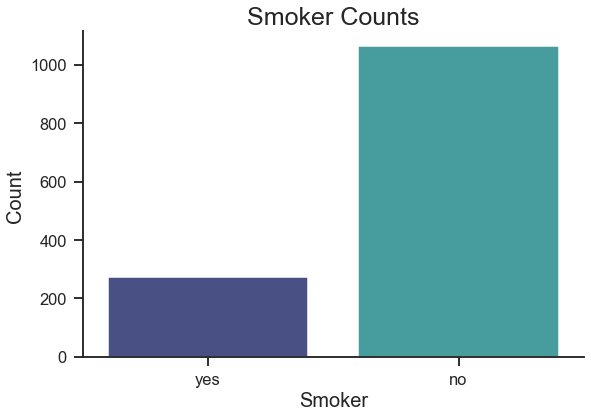

In [19]:
plt.figure(figsize=(8,6))
plt.title("Smoker Counts",fontsize = 25)
sns.countplot(data = df, x = 'smoker', palette = 'mako')
plt.ylabel("Count ", fontsize = 20)
plt.xlabel("Smoker", fontsize = 20)
sns.despine()
plt.show()

In [20]:
region = df.groupby('region').agg(['mean','min','max'])['charges']
region

,mean,min,max
region,,,
northeast,13406.384516,1694.7964,58571.07448
northwest,12417.575374,1621.3402,60021.39897
southeast,14735.411438,1121.8739,63770.42801
southwest,12346.937377,1241.5650,52590.82939


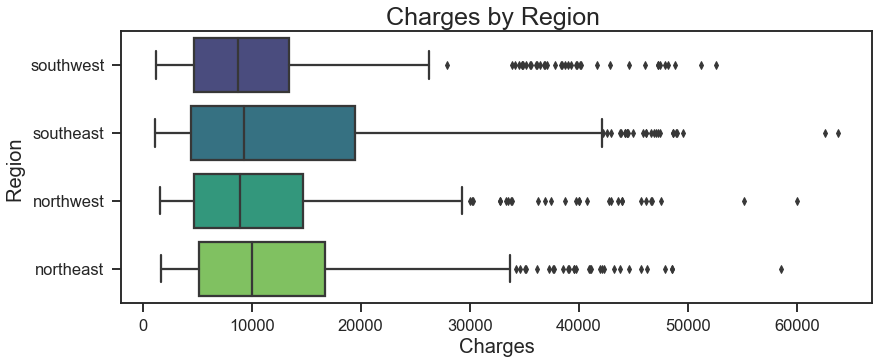

In [21]:
plt.figure(figsize=(12,5))
plt.title("Charges by Region ", fontsize = 25)
sns.boxplot(data = df, x = 'charges', y = 'region', palette = 'viridis',orient = 'h')
plt.ylabel("Region ", fontsize = 20)
plt.xlabel("Charges", fontsize = 20)
plt.show()

In [22]:
kiddos = df.groupby('children').agg(['mean','min','max'])['charges']
kiddos

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


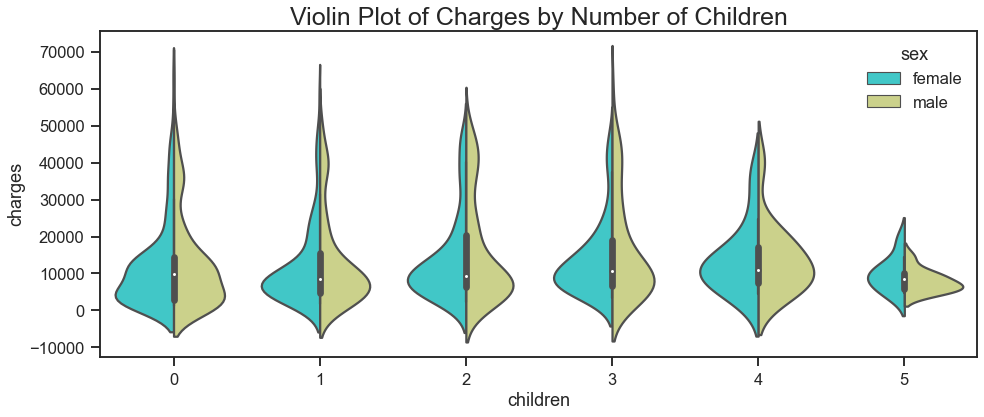

In [23]:
plt.figure(figsize=(14,6))
plt.title('Violin Plot of Charges by Number of Children', fontsize = 25, );
sns.violinplot(x='children', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.show()

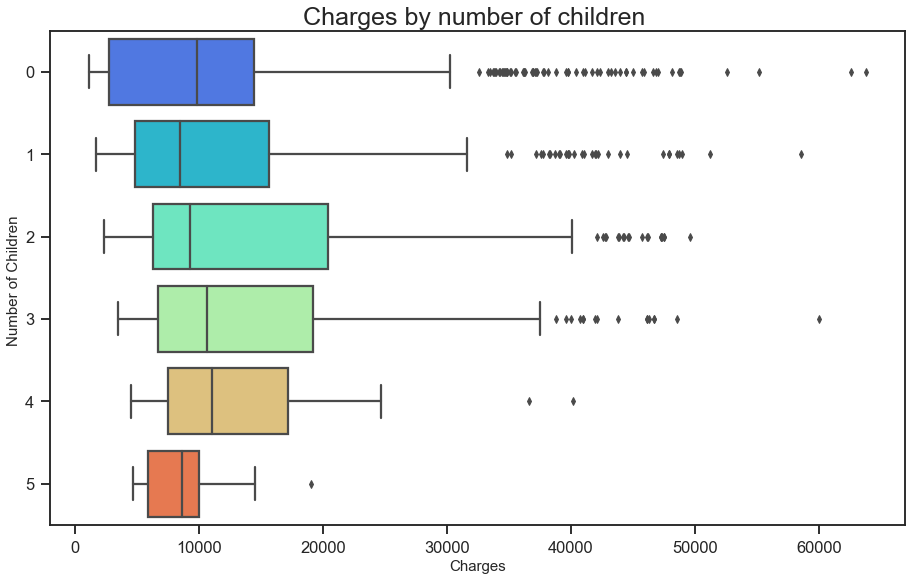

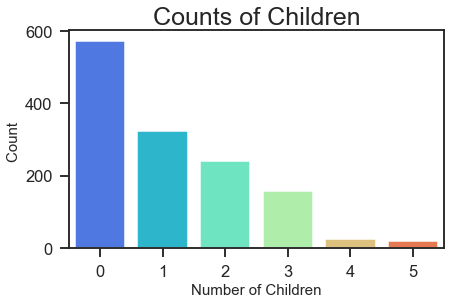

In [24]:
fig2 = plt.figure(figsize=(30,20))

fig2.add_subplot(223)  
plt.title("Charges by number of children ",fontsize = 25)
sns.boxplot(data = df, x = 'charges', y = 'children', palette = 'rainbow',orient = 'h')
plt.ylabel("Number of Children ", fontsize = 15)
plt.xlabel("Charges", fontsize = 15)
plt.show()

fig2.add_subplot(224)  
plt.title("Counts of Children", fontsize = 25)
sns.countplot(data = df, x = 'children', palette = 'rainbow',)
plt.ylabel("Count ", fontsize = 15)
plt.xlabel("Number of Children", fontsize = 15)
plt.show()

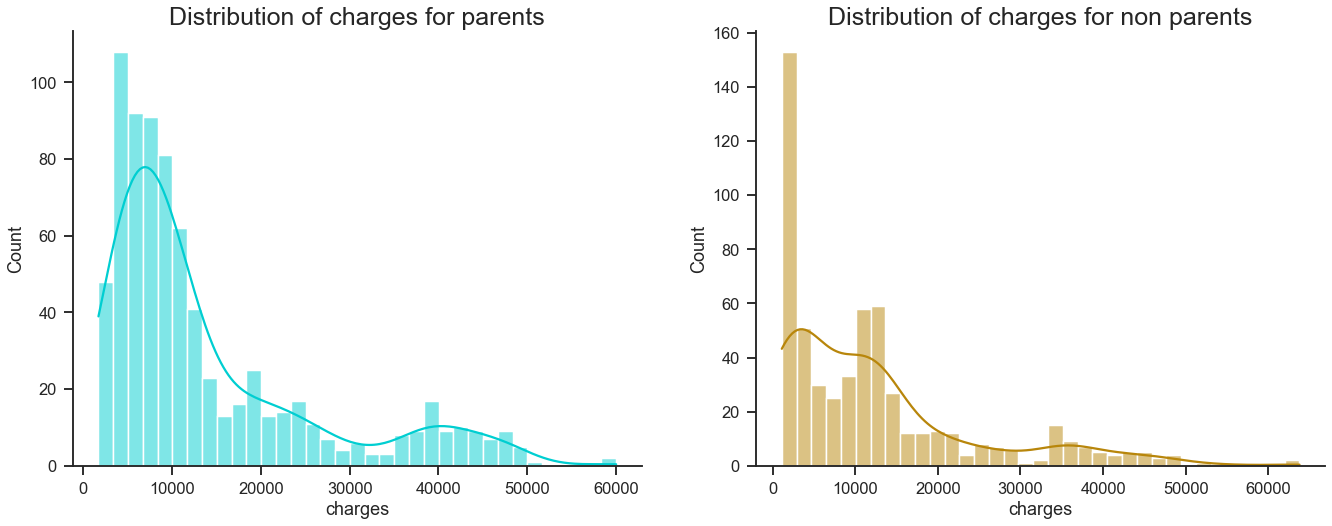

In [25]:
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.histplot(df.query('children >=1'), x = 'charges', kde = True, color = 'darkturquoise',bins = 35)
ax.set_title('Distribution of charges for parents', fontsize = 25)

ax=f.add_subplot(122)
sns.histplot(df.query('children <= 0'), x = 'charges', kde = True, color = 'darkgoldenrod',bins = 35)
ax.set_title('Distribution of charges for non parents', fontsize = 25)
sns.despine()
plt.show()

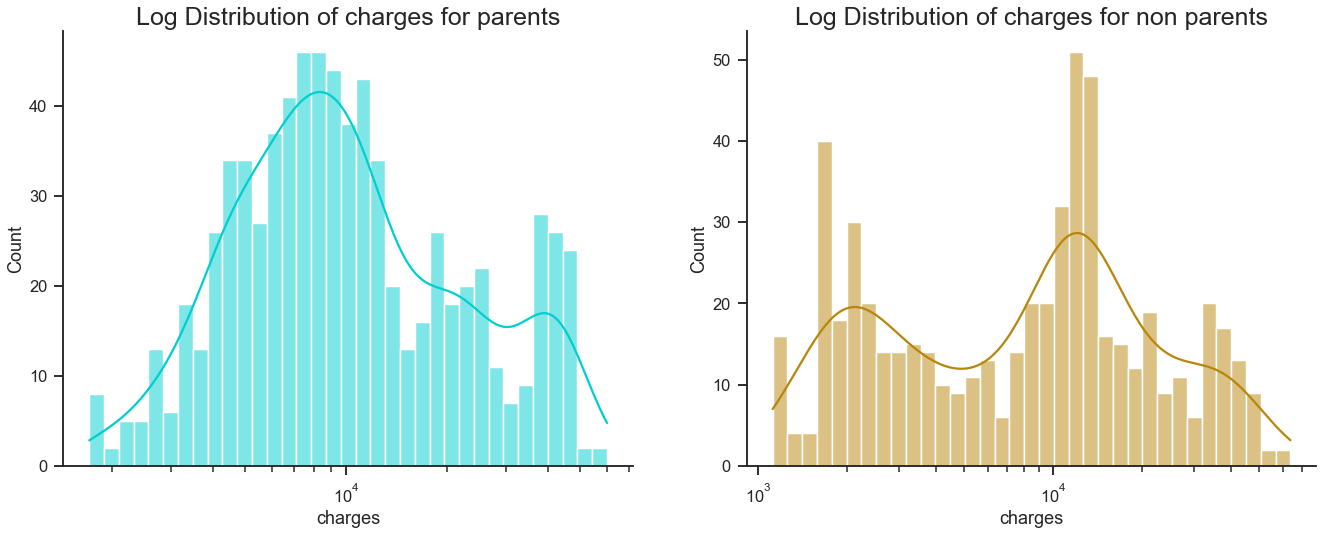

In [26]:
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.histplot(df.query('children >=1'), x = 'charges', kde = True, color = 'darkturquoise',bins = 35,log_scale = True)
ax.set_title('Log Distribution of charges for parents', fontsize = 25,)

ax=f.add_subplot(122)
sns.histplot(df.query('children <= 0'), x = 'charges', kde = True, color = 'darkgoldenrod',bins = 35,log_scale = True)
ax.set_title('Log Distribution of charges for non parents', fontsize = 25,)
sns.despine()
plt.show()

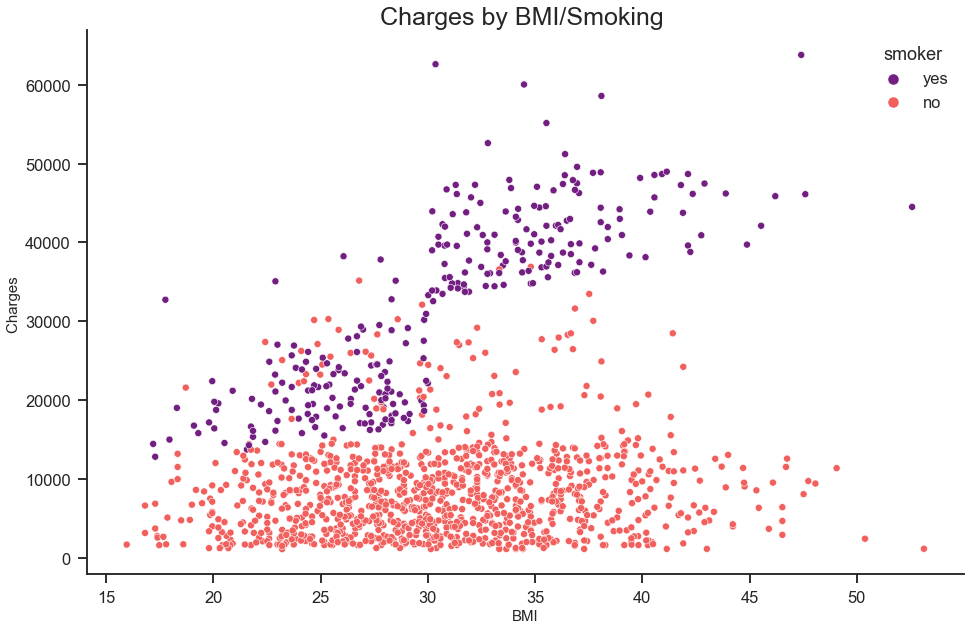

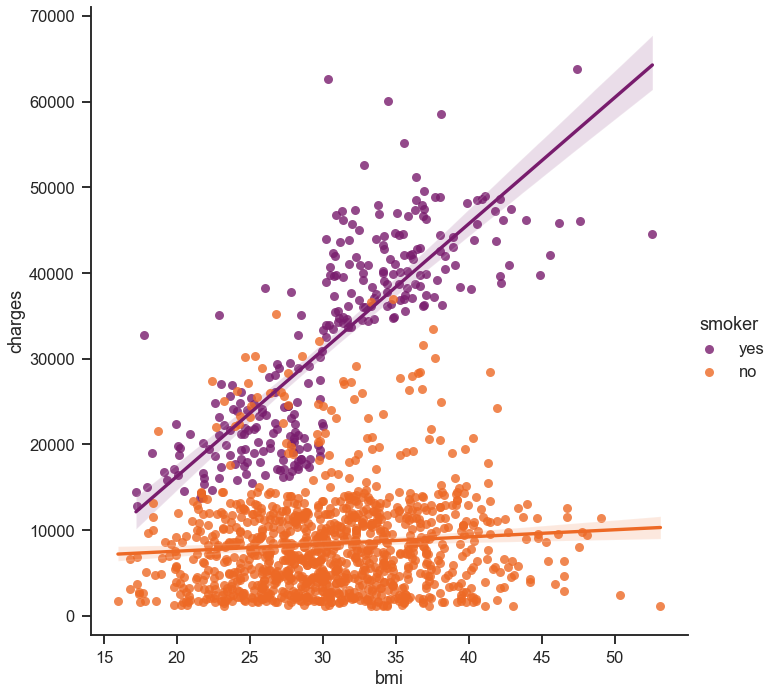

In [27]:
plt.figure(figsize=(14,10))
plt.title("Charges by BMI/Smoking ",fontsize = 25)
sns.scatterplot(data = df, y = 'charges', x = 'bmi', hue = 'smoker',
               palette = 'magma', s = 50)
plt.ylabel("Charges ", fontsize = 15)
plt.xlabel("BMI", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'inferno', size = 10)
plt.show()


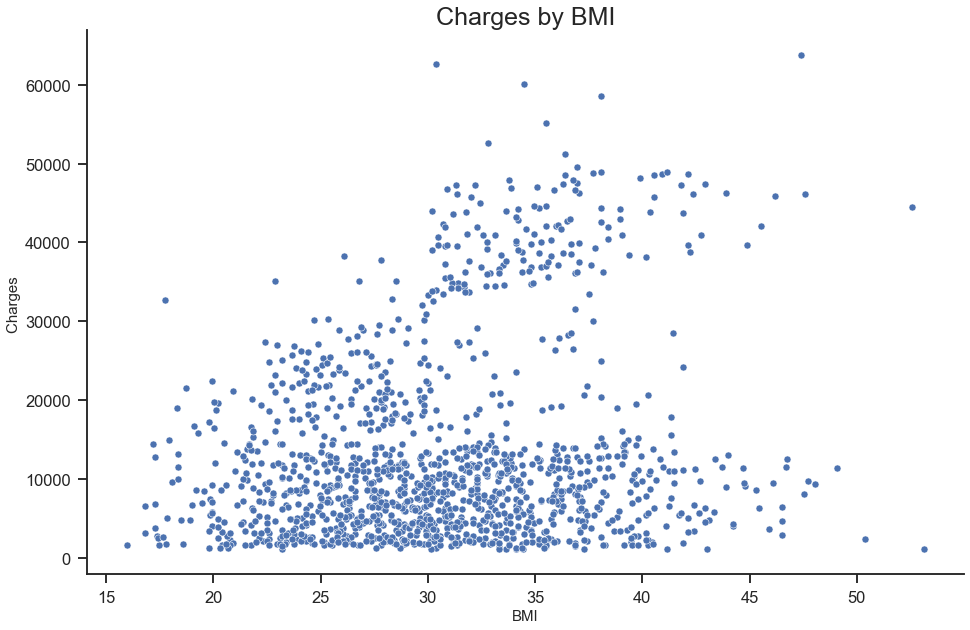

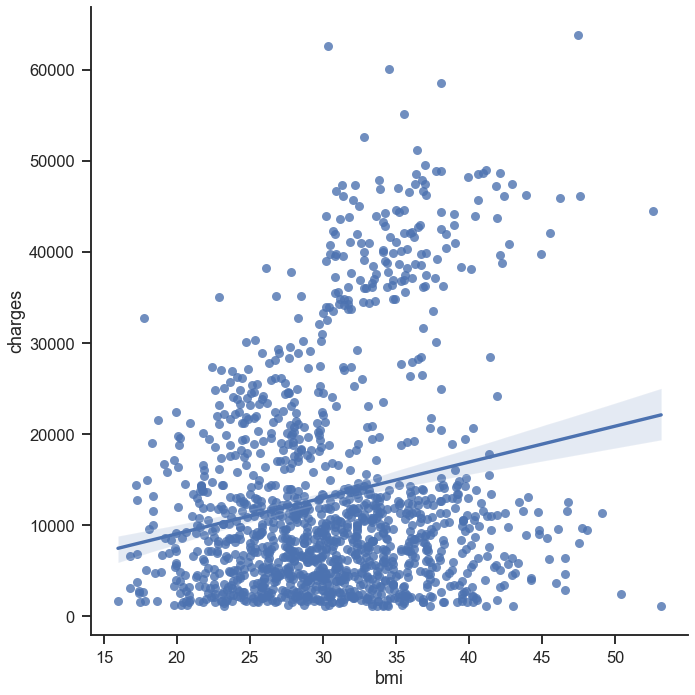

In [28]:
plt.figure(figsize=(14,10))
plt.title("Charges by BMI",fontsize = 25)
sns.scatterplot(data = df, y = 'charges', x = 'bmi',
               palette = 'magma', s = 50)
plt.ylabel("Charges ", fontsize = 15)
plt.xlabel("BMI", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="bmi", y="charges", data=df, palette = 'inferno', size = 10)
plt.show()

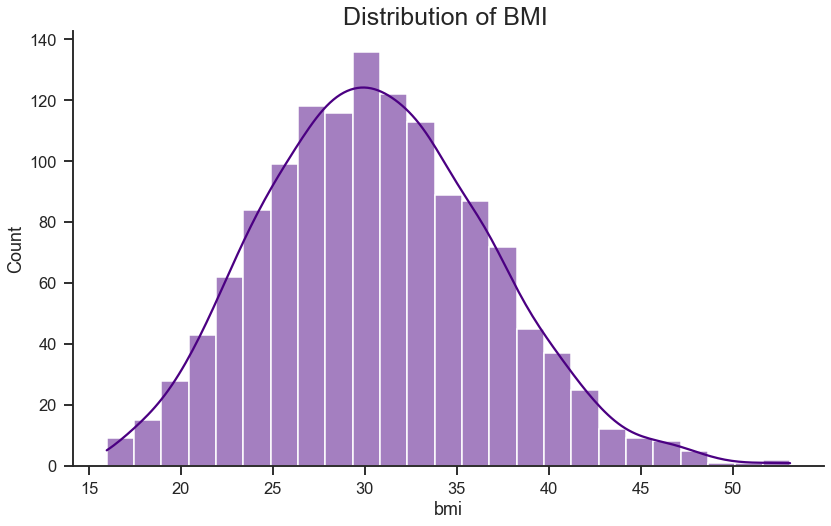

In [29]:
plt.figure(figsize=(12,8))
plt.title("Distribution of BMI ", fontsize=25)
ax = sns.histplot(df["bmi"], color = 'indigo', kde = True,)
sns.despine()

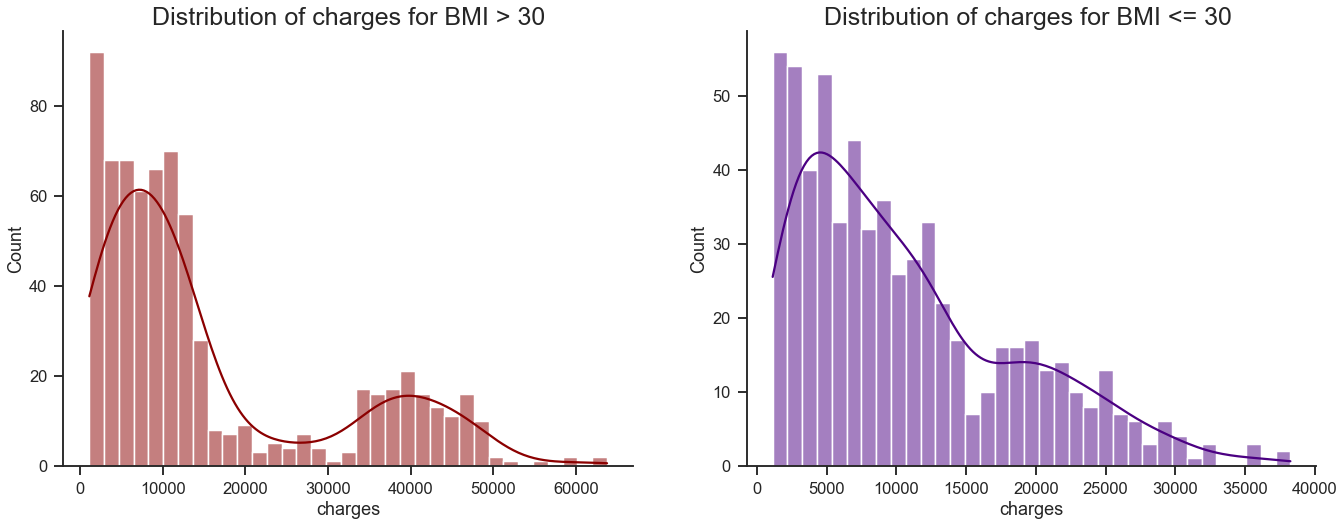

In [30]:
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.histplot(df.query('bmi > 30'), x = 'charges', kde = True, color = 'darkred', bins = 35)
ax.set_title('Distribution of charges for BMI > 30', fontsize = 25)

ax=f.add_subplot(122)
plt.title("Charges by Age/Smoker ",fontsize = 25)
sns.histplot(df.query('bmi <= 30'), x = 'charges', kde = True, color = 'indigo', bins = 35)
ax.set_title('Distribution of charges for BMI <= 30 ', fontsize = 25)
sns.despine()
plt.show()

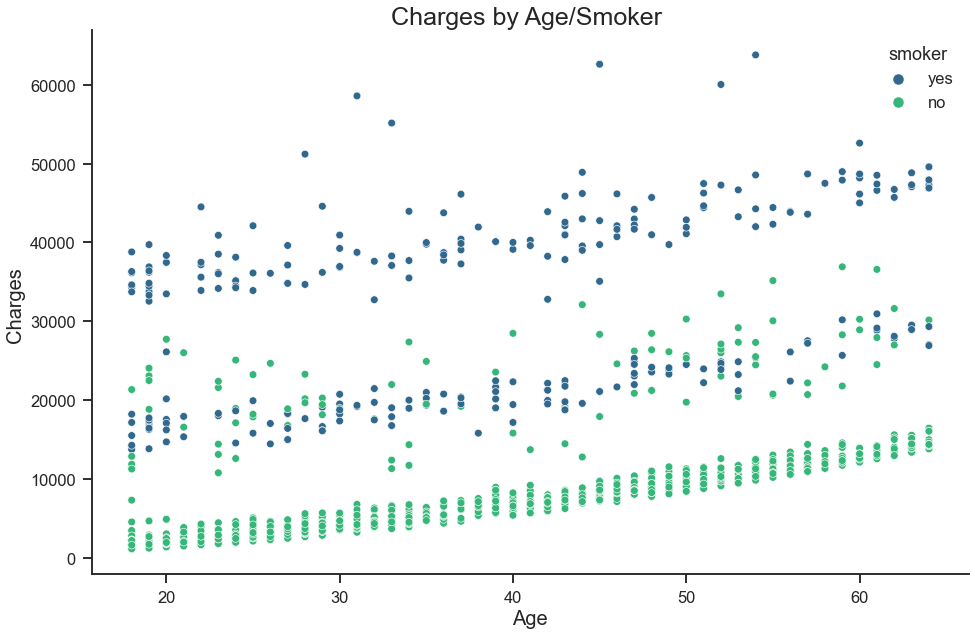

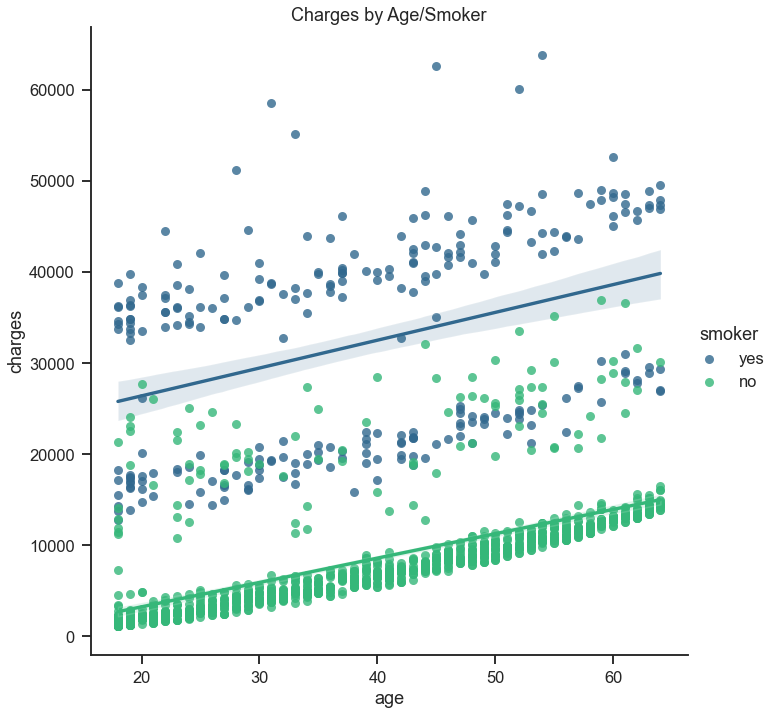

In [31]:
plt.figure(figsize=(14,10))
plt.title("Charges by Age/Smoker ",fontsize = 25)
sns.scatterplot(data = df, y = 'charges', x = 'age', hue = 'smoker',
               palette = 'viridis', s = 60)
plt.ylabel("Charges ", fontsize = 20)
plt.xlabel("Age", fontsize = 20)
sns.despine()
plt.show()
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'viridis', size = 10).set(title='Charges by Age/Smoker')
plt.show()

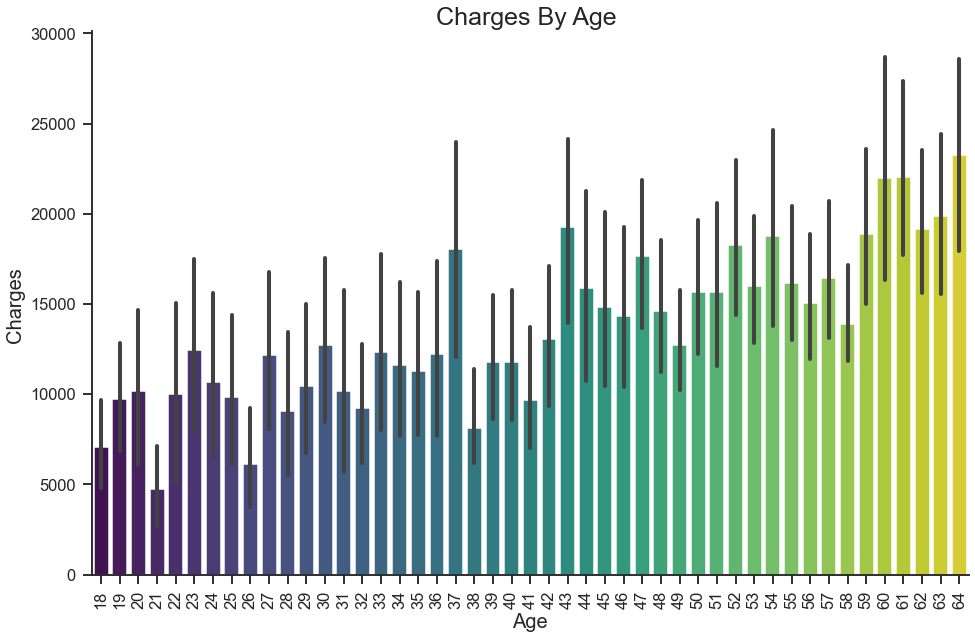

In [32]:
plt.figure(figsize=(14,10))
plt.title("Charges By Age ", fontsize = 25)
sns.barplot(data = df, y = 'charges', x = 'age',
               palette = 'viridis',)
plt.ylabel("Charges ", fontsize = 20)
plt.xlabel("Age", fontsize = 20)
sns.despine()
plt.xticks(rotation=90)
plt.show()

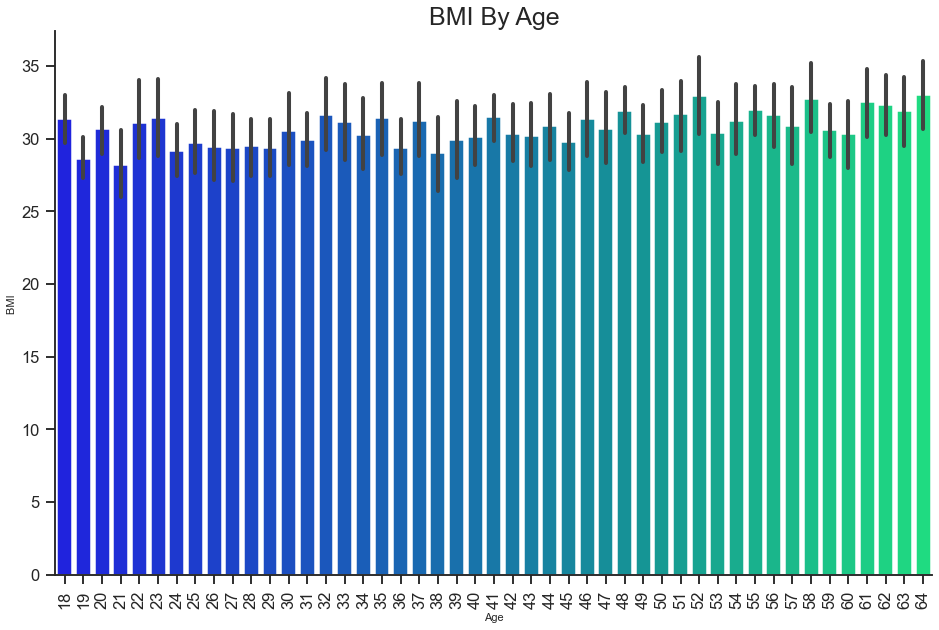

In [33]:
#bmi by age, just for fun
plt.figure(figsize=(14,10))
plt.title("BMI By Age",  fontsize = 25)
sns.barplot(data = df, y = 'bmi', x = 'age',
               palette = 'winter',)
plt.ylabel("BMI ", fontsize = 11)
plt.xlabel("Age", fontsize = 11)
sns.despine()
plt.xticks(rotation=90)
plt.show()

In [34]:
#Model Prep
#Encoding
#using sklearn label encoder
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

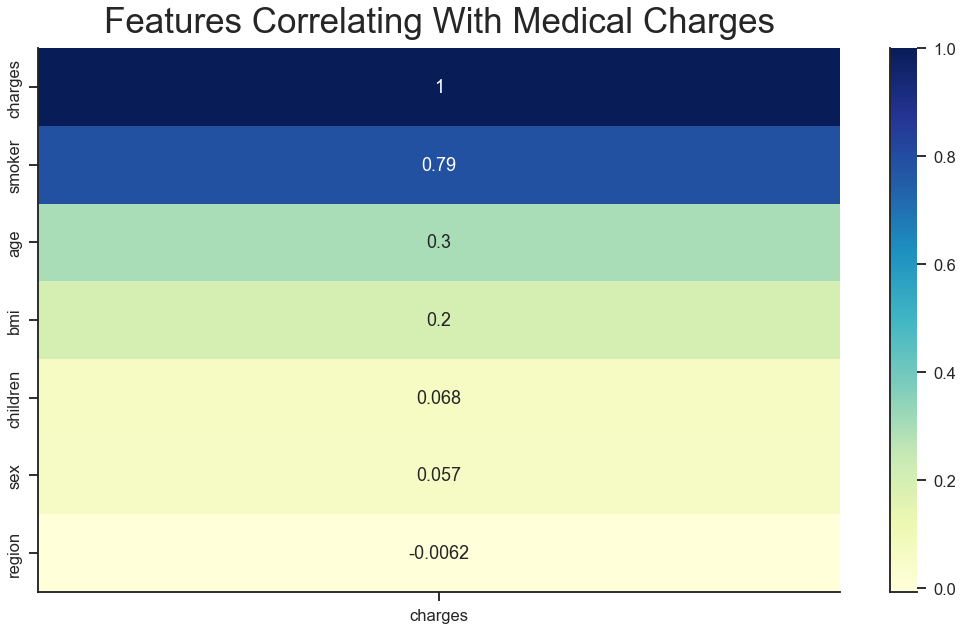

In [35]:
#Correlations + Pairplot
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(df.corr()[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating With Medical Charges', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

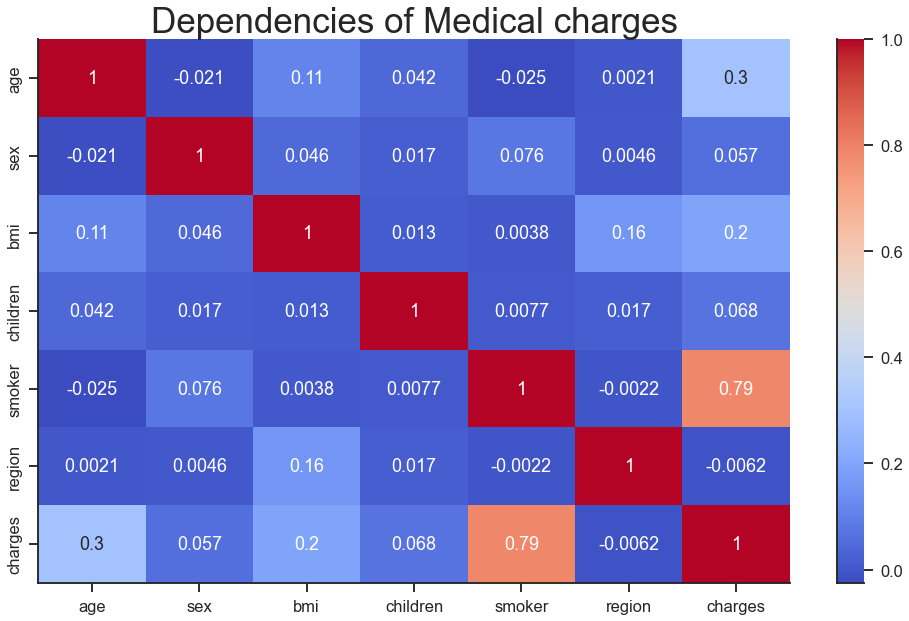

In [36]:
#Correlation using heatmap
plt.figure(figsize = (15, 10))
plt.title("Dependencies of Medical charges",fontsize = 35)
sns.heatmap(df.corr(), annot = True, cmap="coolwarm",cbar=True,
            linewidths=0,linecolor='white',)
sns.despine()
plt.show()

To find the correlation

In [37]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

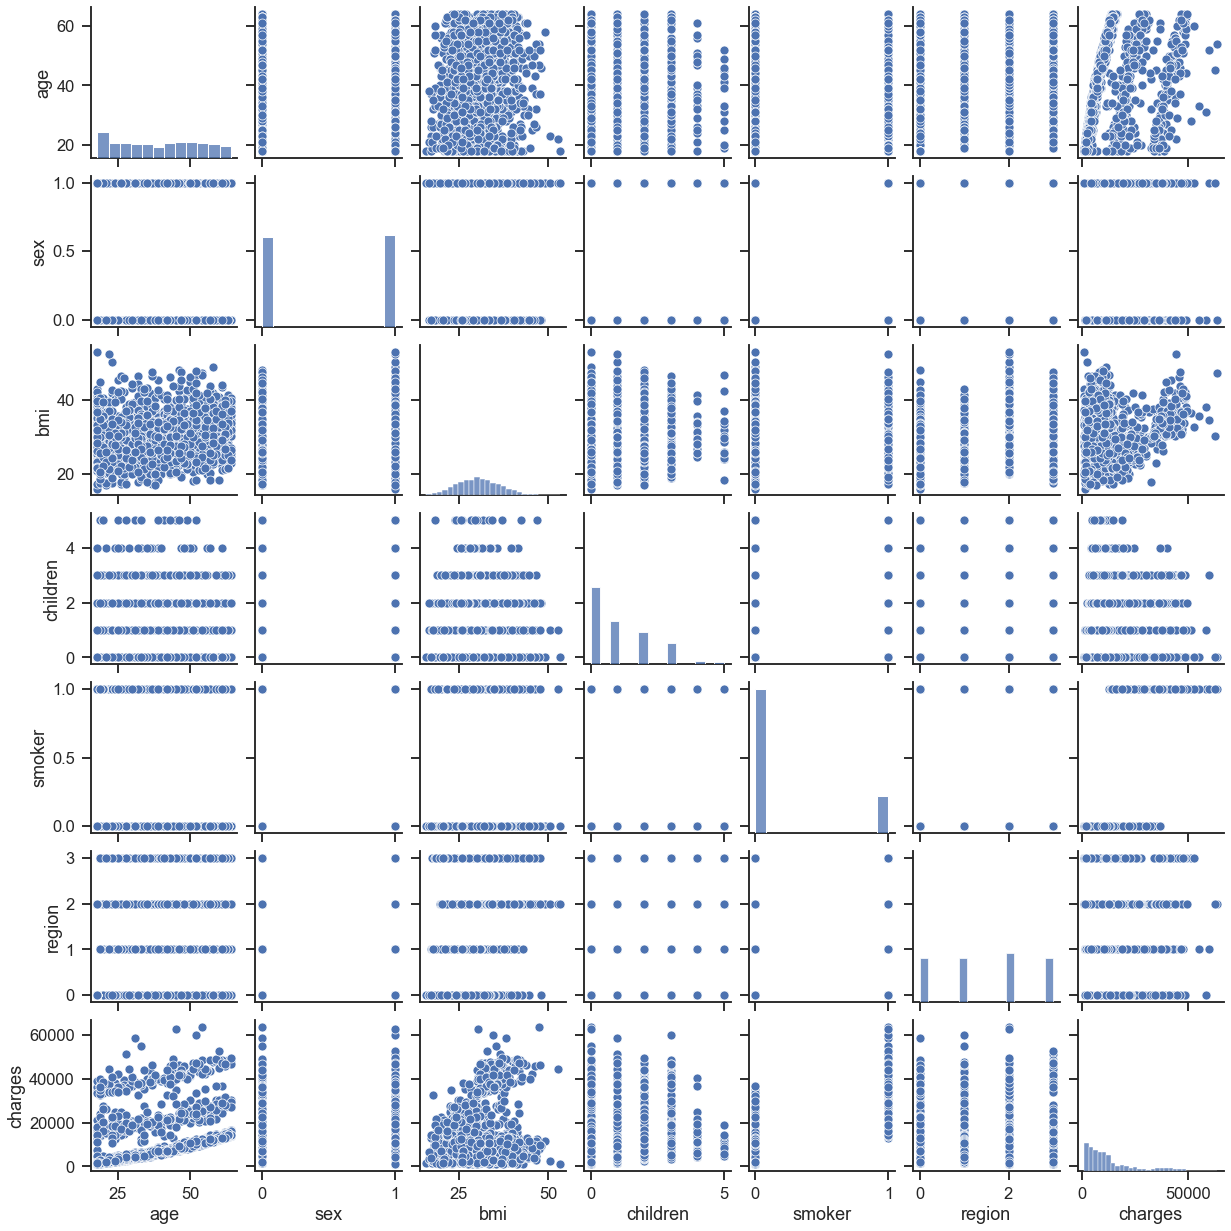

In [38]:
sns.pairplot(df)
sns.despine()
plt.show()

In [39]:
def build_model(X,y):
    """Used to build linear regression model with stats models and print summary"""
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return lm

Splitting Data for Train/Test

In [40]:
X = df[['age', 'bmi', 'sex','children', 'region','smoker',]]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)
X_train.to_csv('x_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns )
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns )

In [41]:
len(X_train)

1003

In [42]:
len(X_test)

335

In [43]:
len(y_train)

1003

In [44]:
len(y_test)

335

In [45]:
X_train.head()

,age,bmi,sex,children,region,smoker
1043,-0.779886,-0.805683,-1.027292,-0.907059,1.324358,-0.517702
968,-1.280350,-0.814660,0.973434,0.739602,-1.382839,-0.517702
594,0.149548,1.554541,0.973434,-0.907059,0.421959,-0.517702
1079,1.722435,0.477260,0.973434,1.562933,0.421959,-0.517702
1051,1.793930,-0.706116,0.973434,-0.907059,-1.382839,-0.517702


In [46]:
#Build Model
def checkVIF(X):
    """Creates dataframe of variance inflation factor results"""
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [47]:
pd.options.display.float_format = '{:.5f}'.format #To remove exponential values in the summary statistics
model1 = build_model(X_train,y_train)
model = sm.OLS(y_train, X_train).fit()
print("\nResidual Standard Error: ", model.resid.std(ddof=X.shape[1]))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     511.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          3.59e-300
Time:                        14:17:02   Log-Likelihood:                -10160.
No. Observations:                1003   AIC:                         2.033e+04
Df Residuals:                     996   BIC:                         2.037e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.342e+04    192.346     69.749      0.0

In [48]:
# To get the Residual Standard Error.
model = sm.OLS(y_train, X_train).fit()
model.resid.std(ddof=X.shape[1])

6088.577018416321

In [49]:
model1

In [50]:
model1 = build_model(X_test,y_test)
model = sm.OLS(y_test, X_test).fit()
pd.options.display.float_format = '{:.5f}'.format #To remove exponential values in the summary statistics
print("\nResidual Standard Error: ", model.resid.std(ddof=X.shape[1]))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     156.7
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.64e-93
Time:                        14:17:02   Log-Likelihood:                -3384.0
No. Observations:                 335   AIC:                             6782.
Df Residuals:                     328   BIC:                             6809.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.321e+04    328.861     40.176      0.0

In [51]:
#Improving model
checkVIF(X_train)

,Features,VIF
1,bmi,1.04000
4,region,1.03000
0,age,1.02000
2,sex,1.01000
5,smoker,1.01000
3,children,1.00000


In [52]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('Training Score:',regressor.score(X_train, y_train))
print('Testing Score:',regressor.score(X_test, y_test))

Mean Absolute Error: 2605.1598182243283
Mean Squared Error: 22915181.80816286
Root Mean Squared Error: 4786.980447856755
Training Score: 0.972790062090773
Testing Score: 0.8296464480974576


RFR - Random Forest Regressor

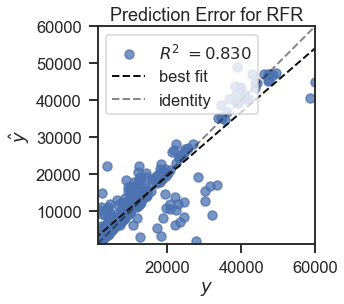

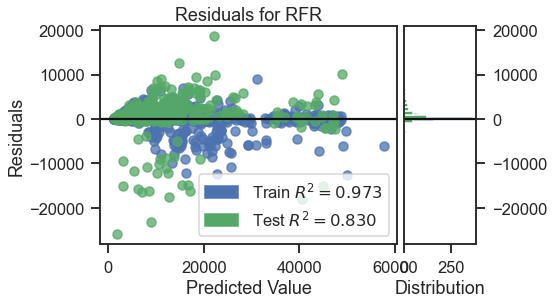

In [53]:
visualizer = prediction_error(regressor, X_train, y_train, X_test, y_test,title = "Prediction Error for RFR")
viz = residuals_plot(regressor, X_train, y_train, X_test, y_test,title = "Residuals for RFR")

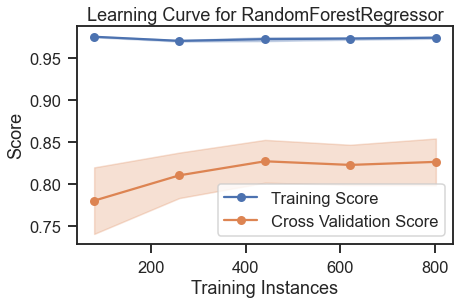

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [54]:
visualizer = LearningCurve(regressor, scoring='r2')
visualizer.fit(X_train, y_train)       
visualizer.show()  